In [1]:

from __future__ import print_function
import os 
import numpy as np
np.random.seed(123) 
from PIL import Image
import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D,  Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.datasets import mnist
from keras import backend as K
from keras.optimizers import SGD, RMSprop, adadelta, adamax
from keras.layers import GlobalAveragePooling2D
from sklearn.utils import shuffle
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.mobilenet import MobileNet
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
import keras
from keras.layers import  Lambda, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
from keras.models import Sequential, model_from_json
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
from keras.utils.np_utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings("ignore")

keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
train_dir = "hymenoptera/train/"
test_dir =  "hymenoptera/test/"
img_rows,img_cols = 128, 128

In [3]:
def get_data(folder):
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['ants']:
                label = 0
            elif folderName in ['bees']:
                label = 1
            else:
                label = 2
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (img_rows,img_cols, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [4]:
X_train, y_train = get_data(train_dir)
X_test, y_test= get_data(test_dir)

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

X_train /=255.
X_test /=255.

100%|██████████| 70/70 [00:00<00:00, 93.43it/s] 


In [5]:
nb_classes=2
nepochs=50

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

ants


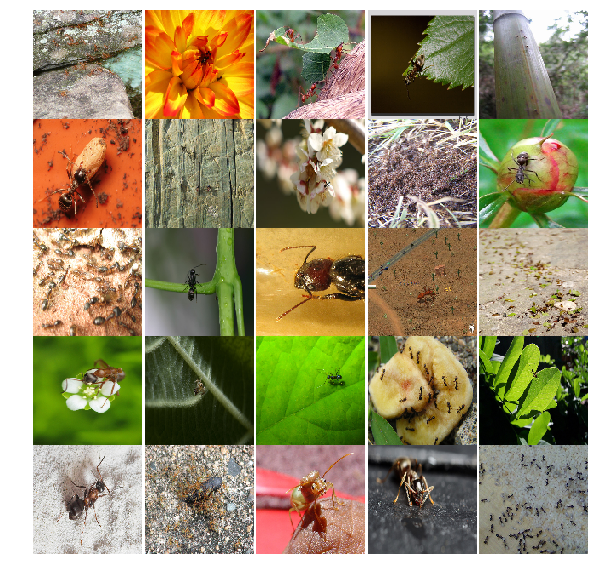

In [6]:
print('ants')
multipleImages = glob('hymenoptera/test/ants/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) 
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1
    
plt.show()

bees


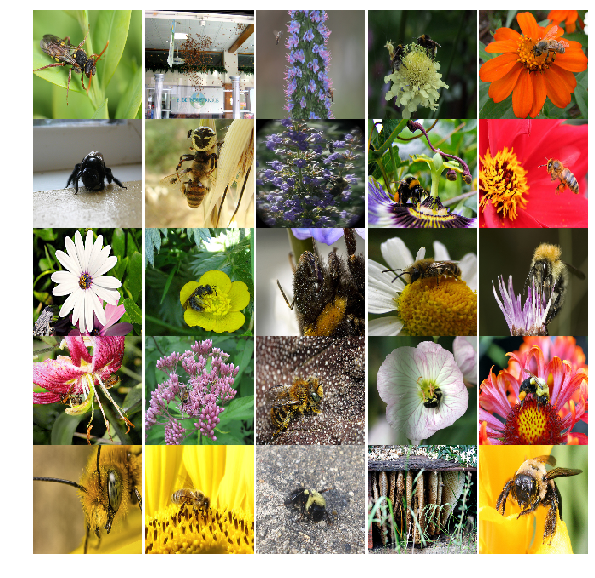

In [7]:
print("bees")
multipleImages = glob('hymenoptera/test/bees/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) 
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1
    
plt.show()

{0: 'ants', 1: 'bees'}


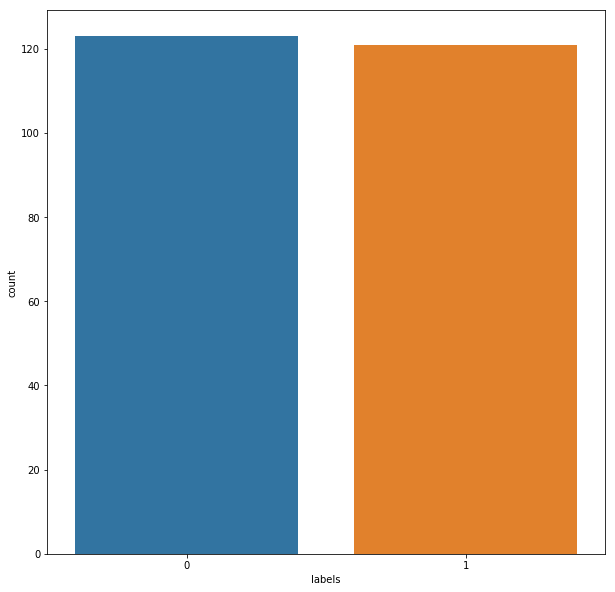

In [8]:
map_characters = {0: 'ants', 1: 'bees'}
dict_characters=map_characters
df = pd.DataFrame()
df["labels"]=y_train
lab = df['labels']
dist = lab.value_counts()
sns.countplot(lab)
print(dict_characters)    
    

In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size=5, padding= 'same',  
                 input_shape=(img_rows,img_cols, 3)))
convout1 = Activation('relu')
model.add(convout1)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding= 'same'))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=3, padding= 'same'))
convout2 = Activation('relu')
model.add(convout2)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding= 'same'))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=5, padding= 'same'))
convout3 = Activation('relu')
model.add(convout3)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding= 'same'))
model.add(Dropout(0.5))

model.add(Conv2D(32, kernel_size=3, padding= 'same'))
convout4 = Activation('relu')
model.add(convout4)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding= 'same'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(nb_classes, activation='softmax'))


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      2432      
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 64, 64, 32)        0         
__________

In [11]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam', metrics = ['accuracy'])

In [12]:
hist =model.fit(X_train, Y_train,batch_size = 32, epochs = nepochs,
                verbose=1, validation_data = (X_test, Y_test))

Train on 244 samples, validate on 153 samples
Epoch 1/50
244/244 [==============================] - 6s 24ms/step - loss: 2.2804 - acc: 0.6107 - val_loss: 1.1426 - val_acc: 0.5686
Epoch 2/50
244/244 [==============================] - 2s 9ms/step - loss: 1.7051 - acc: 0.5410 - val_loss: 1.0204 - val_acc: 0.5490
Epoch 3/50
244/244 [==============================] - 2s 9ms/step - loss: 1.1222 - acc: 0.5369 - val_loss: 1.3256 - val_acc: 0.4771
Epoch 4/50
244/244 [==============================] - 2s 9ms/step - loss: 0.8686 - acc: 0.6189 - val_loss: 1.7426 - val_acc: 0.4575
Epoch 5/50
244/244 [==============================] - 2s 9ms/step - loss: 0.8682 - acc: 0.5738 - val_loss: 0.9628 - val_acc: 0.5425
Epoch 6/50
244/244 [==============================] - 2s 9ms/step - loss: 0.7173 - acc: 0.6311 - val_loss: 1.0032 - val_acc: 0.5229
Epoch 7/50
244/244 [==============================] - 2s 9ms/step - loss: 0.6903 - acc: 0.6557 - val_loss: 0.8350 - val_acc: 0.6144
Epoch 8/50
244/244 [=========

{'val_loss': [1.142638620987437, 1.0204006090662838, 1.3256254668524063, 1.742620103694255, 0.9627751039913277, 1.0031589197567086, 0.8349741915472193, 0.7914851615631503, 0.8493887595101899, 0.980038615223629, 1.127615680881575, 1.314770592388764, 1.3417805256017672, 1.2157598620925854, 1.2002248454327678, 1.326086011782191, 1.3048806330736946, 1.4262225108793358, 1.4549234564495241, 1.2904721996168684, 1.332108989163162, 1.2071109336186079, 1.3018548136053523, 1.1977624333664483, 1.0833531753981815, 1.1399821315715515, 1.014713078980742, 0.8549759489258909, 0.7032536203954735, 0.787109234753777, 0.7210573211214901, 0.7472436517671822, 0.7928480355957754, 0.8601028447836833, 0.9279960279468618, 1.025328837675986, 0.9131494741034664, 0.8388812960752474, 0.8602805924571417, 0.7201821954032175, 0.7753003068219603, 0.9564245941202625, 0.9444517361767152, 0.9774565604679725, 1.1293697343542686, 1.1723609443973093, 1.1983726985898673, 1.1996689288834341, 1.218680596819111, 1.540811632193771

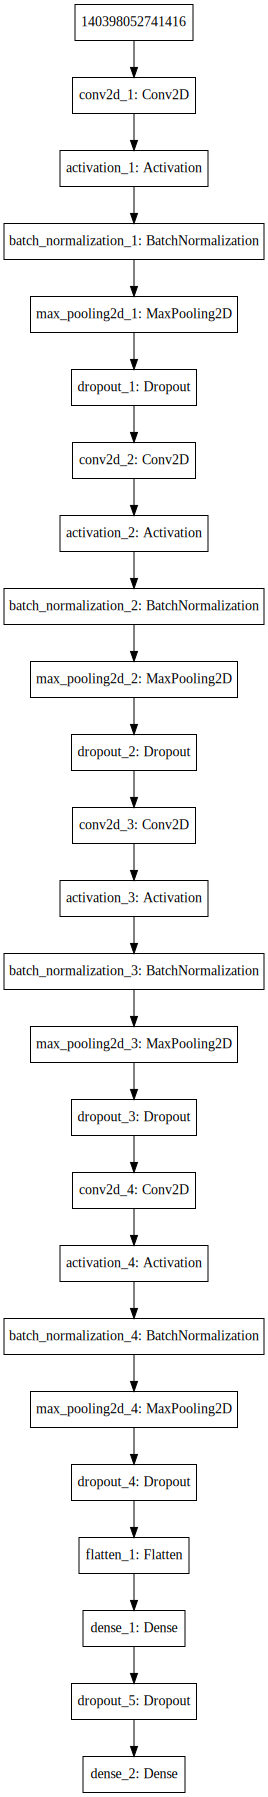

In [13]:
print(hist.history)
plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [14]:
score = model.evaluate(X_test, Y_test, verbose = 0)
model.save('my_model.h5')

In [15]:
# save as JSON
json_string = model.to_json()

# save as YAML
yaml_string = model.to_yaml()

print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable


Test loss: 1.540811632193771
Test accuracy: 0.6862745090247759


True

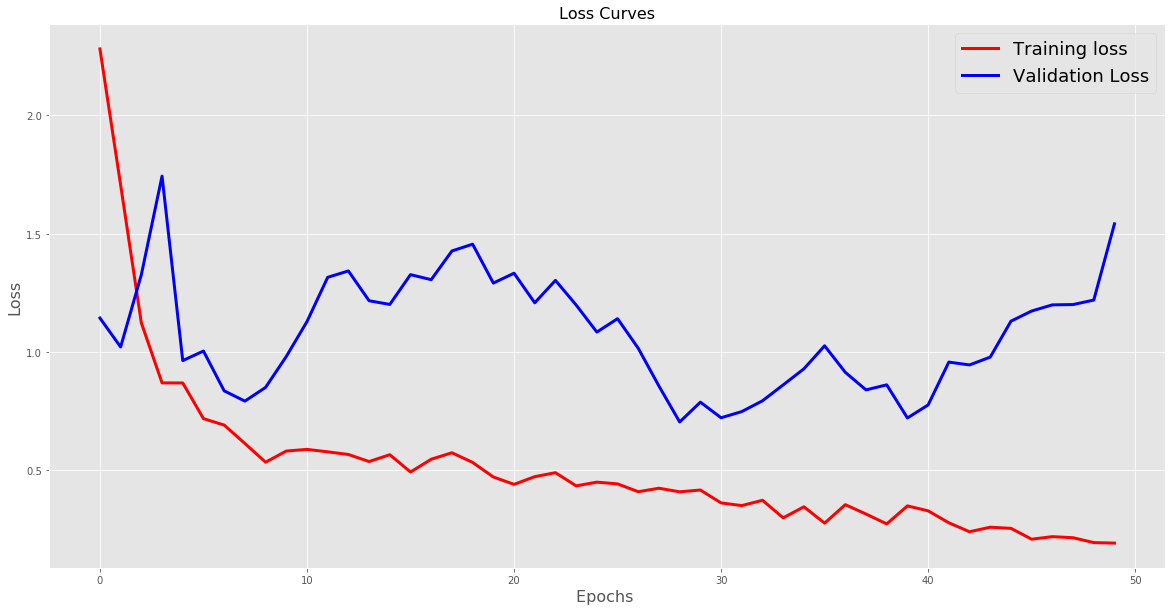

In [16]:
plt.figure(figsize=(20,10))
plt.style.use('ggplot') 
# Loss Curves
plt.plot(hist.history['loss'],'r',linewidth=3.0)
plt.plot(hist.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.grid('True')
plt.show() 

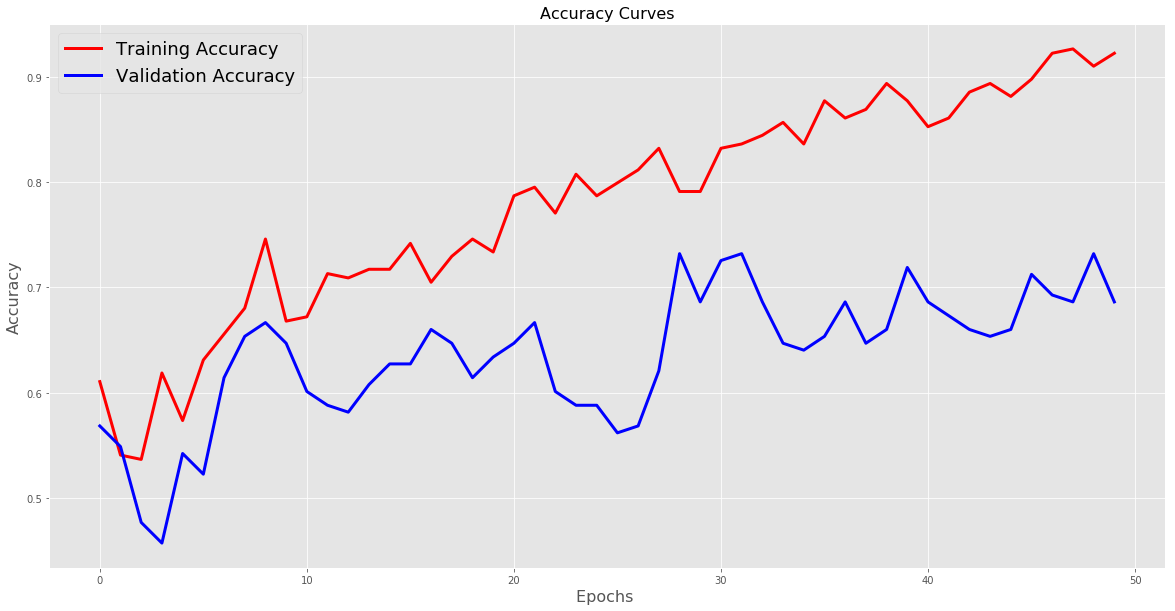

In [17]:

# Accuracy Curves

plt.figure(figsize=(20,10))
plt.plot(hist.history['acc'],'r',linewidth=3.0)
plt.plot(hist.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.grid('True')
plt.show()

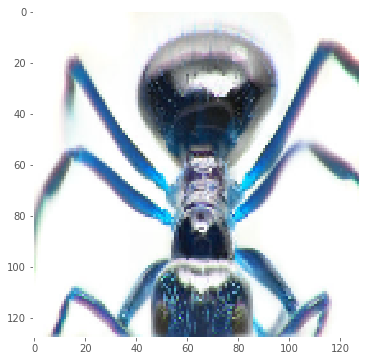

In [18]:
d = random.choice(X_test)
img_data, img_num = d, d
mg=img_data.astype('float32')*255
im = cv2.resize(mg, (img_rows,img_cols)) 
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.grid(False)
ax.imshow(im)



In [19]:
prediction = model.predict(np.array([im]))
imp = np.expand_dims(im, axis=0)
print(f"{prediction[0]}% likelihood it is a []")

out= model.predict_classes(imp)
pred = dict(zip(df, model.predict_proba(imp)))
print(f"{(pred)}% likelihood it is a []")

[1. 0.]% likelihood it is a []
{'labels': array([1., 0.], dtype=float32)}% likelihood it is a []
